In [3]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import meshgrid, cm, contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [13]:
# Potential function: Plotting the Hamiltonian of the 0-π Qubit that varies with Θ and Φ
def potential(theta, phi):
    return -2*Ej*np.cos(theta)*np.cos(phi - flux_ext/2)+El*(phi**2)+2*Ej

<IPython.core.display.Javascript object>


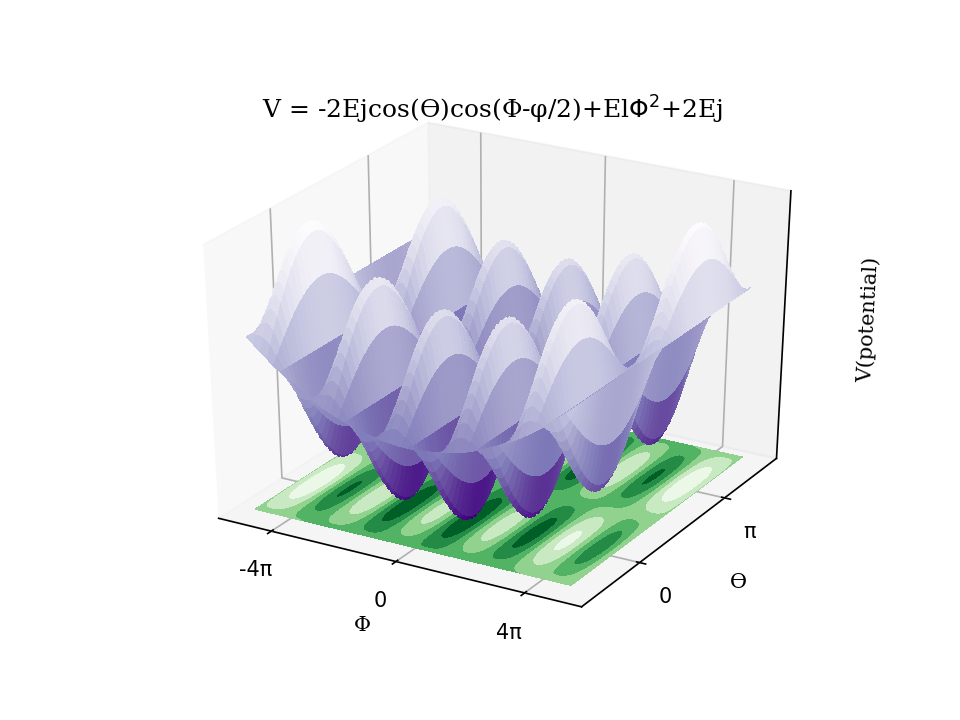

In [14]:
#Coefficients and constants
El = 1
Ej = 165*El
flux_ext = 0.5*2*np.pi
theta_array = np.linspace(-np.pi/2, 3*np.pi/2, 1000)
phi_array = np.linspace(-5*np.pi, 5*np.pi, 8000)
PHI, THETA= meshgrid(phi_array, theta_array)
V = potential(THETA, PHI)

# Plot the potential in 3-d graph 
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(PHI, THETA, V, cmap=cm.Purples_r, linewidth=0, antialiased=False)
cset = ax.contourf(PHI, THETA, V, zdir='z', offset=np.min(V), cmap=cm.Greens_r)

plt.title('V = -2Ejcos(\u03F4)cos(\u03A6-\u03C6/2)+El$\u03A6^{2}$+2Ej', family = 'serif')
plt.xticks(np.linspace(-4*np.pi, 4*np.pi, 3), ('-4π', '0', '4π'))
plt.yticks(np.linspace(0, np.pi, 2), ('0', 'π'))

plt.gca().zaxis.set_major_locator(plt.NullLocator())
ax.set_xlabel('\u03A6', family = 'serif')
ax.set_ylabel('\u03F4', family = 'serif')
ax.set_zlabel('V(potential)', family = 'serif')
plt.show()


In [15]:
# V has 1000 rows, 8000 columns
# plot against charge noise
FLUX = [0, 0.5, 1.0]
POTENTIAL = np.zeros((len(FLUX), 1000, 8000))

for i in range (0, len(FLUX)):
    flux_ext = FLUX[i]
    POTENTIAL[i] = potential(THETA, PHI)


<IPython.core.display.Javascript object>


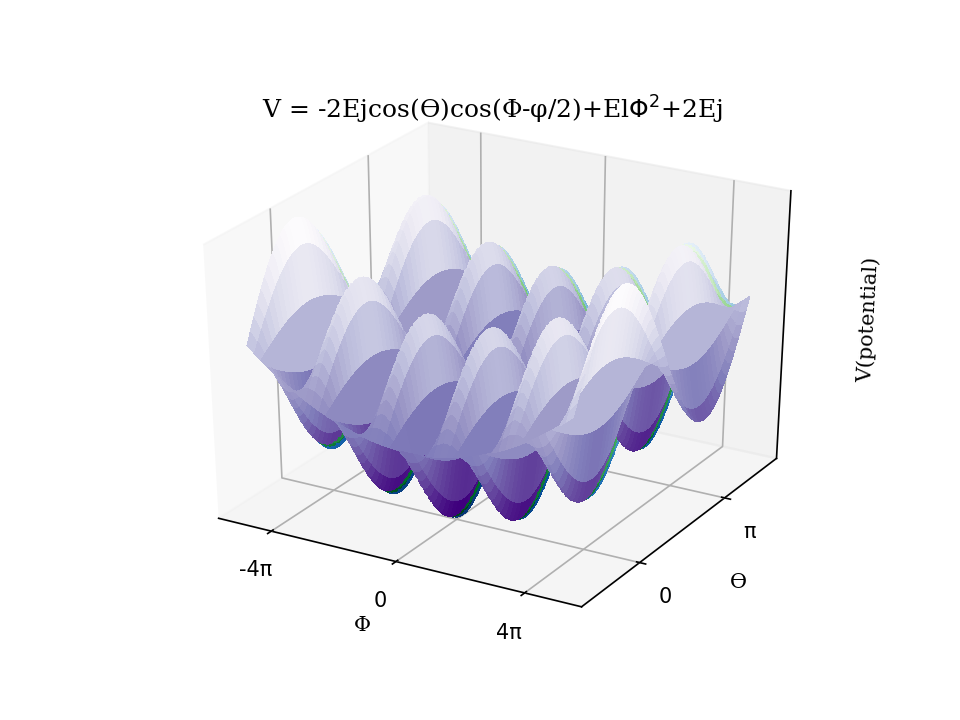

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(PHI, THETA, POTENTIAL[0], cmap=cm.Purples_r, linewidth=0, antialiased=False, label = 'Flux = 0')
surf = ax.plot_surface(PHI, THETA, POTENTIAL[1], cmap=cm.Greens_r, linewidth=0, antialiased=False)
surf = ax.plot_surface(PHI, THETA, POTENTIAL[2], cmap=cm.Blues_r, linewidth=0, antialiased=False)

plt.title('V = -2Ejcos(\u03F4)cos(\u03A6-\u03C6/2)+El$\u03A6^{2}$+2Ej', family = 'serif')
plt.xticks(np.linspace(-4*np.pi, 4*np.pi, 3), ('-4π', '0', '4π'))
plt.yticks(np.linspace(0, np.pi, 2), ('0', 'π'))

plt.gca().zaxis.set_major_locator(plt.NullLocator())
ax.set_xlabel('\u03A6', family = 'serif')
ax.set_ylabel('\u03F4', family = 'serif')
ax.set_zlabel('V(potential)', family = 'serif')
plt.show()